In [24]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 278 kB 23.5 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=f1a980177f6a39ccecf7be698c5a28077d60318515f8c891eadb9db997641133
  Stored in directory: /home/2f72d127-6d61-407e-9581-62ac8f80e169/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt  # Para graficar los datos
import pydotplus

In [6]:
df = pd.read_csv("wine.data",index_col=False, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df[0].value_counts()



2    71
1    59
3    48
Name: 0, dtype: int64

In [10]:
x= df[[1,2,3,4,5,6,7,8,9,10,11,12,13]]
x

y=df[0]
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=4)

##print(f"{x_train, y_train}")
##print("=================")
##print(f"{x_test, y_test}")

In [14]:
dt= DecisionTreeClassifier(criterion='entropy', max_depth=4)

dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

In [36]:
print(f"Prediccion: {dt_pred[0:5]}")
print(f"Reales: {y_test[0:5]}")

Prediccion: [3 3 1 1 2]
Reales: 163    3
142    3
14     1
45     1
81     2
Name: 0, dtype: int64


In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt

print(f"precision: {metrics.accuracy_score(y_test,dt_pred)}")

precision: 0.9629629629629629


In [28]:
from sklearn import tree
tree.export_graphviz(dt,out_file='arbol.dot')

from IPython.display import Image

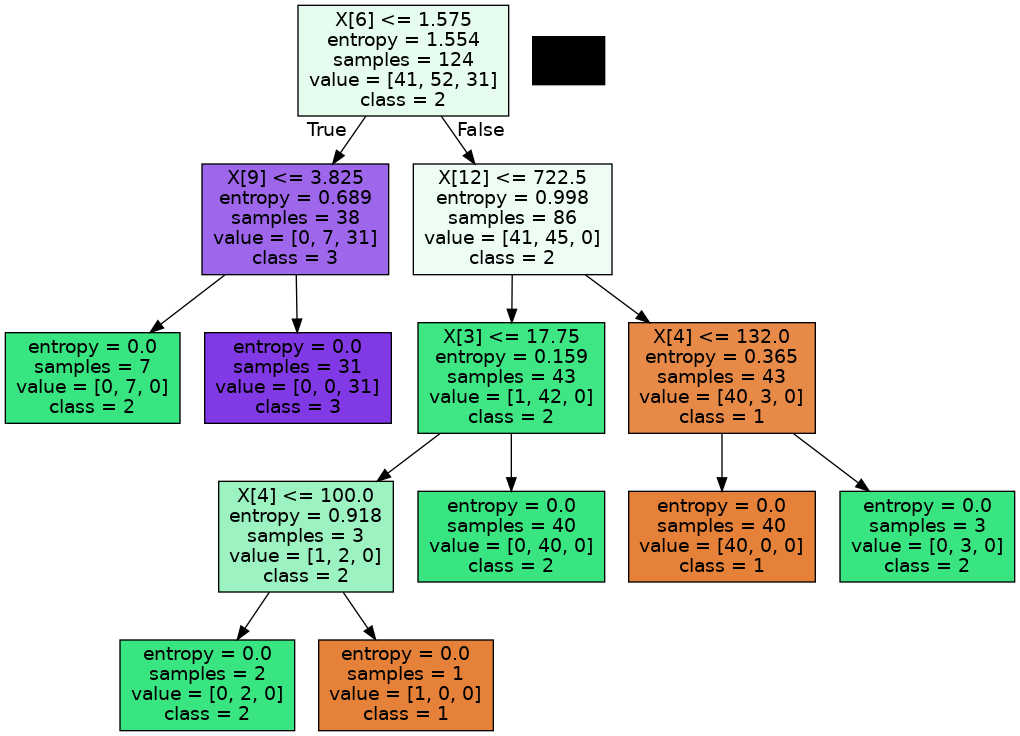

In [34]:

dot_data = tree.export_graphviz(dt,
                               out_file=None,
                                class_names=['1','2','3'],
                                filled=True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
